In [1]:
import pandas as pd

In [2]:
df1= pd.read_excel('CPI_data.xlsx')

In [4]:
df2=pd.read_excel('monthly_average_CNY.xlsx')


In [5]:

# Convert the 'Time' column to datetime format
df1['TIME'] = pd.to_datetime(df1['TIME'])

# Select rows with 'CHN' country code and a timestamp between 2013 and 2022
mask = (df1['LOCATION'] == 'CHN') 
chn_df = df1.loc[mask]

chn_df

,LOCATION,TIME,Value
960,CHN,2013-01-01,2.0
961,CHN,2013-02-01,3.2
962,CHN,2013-03-01,2.1
963,CHN,2013-04-01,2.4
964,CHN,2013-05-01,2.1
...,...,...,...
1075,CHN,2022-08-01,2.5
1076,CHN,2022-09-01,2.8
1077,CHN,2022-10-01,2.1
1078,CHN,2022-11-01,1.6


In [7]:
chn_df = chn_df.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = pd.concat([chn_df, df2], axis=1)
df3 # China 的dataframe

,LOCATION,TIME,Value,index,CNY/USD
0,CHN,2013-01-01,2.0,2013-01-31,0.160396
1,CHN,2013-02-01,3.2,2013-02-28,0.160114
2,CHN,2013-03-01,2.1,2013-03-31,0.160488
3,CHN,2013-04-01,2.4,2013-04-30,0.161311
4,CHN,2013-05-01,2.1,2013-05-31,0.162514
...,...,...,...,...,...
115,CHN,2022-08-01,2.5,2022-08-31,0.147059
116,CHN,2022-09-01,2.8,2022-09-30,0.142712
117,CHN,2022-10-01,2.1,2022-10-31,0.139092
118,CHN,2022-11-01,1.6,2022-11-30,0.139558


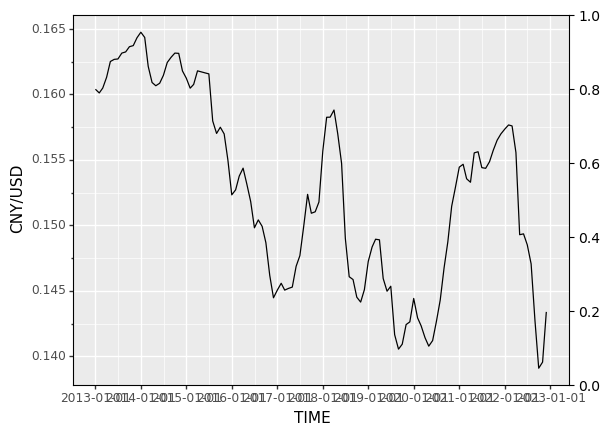

In [12]:
# 结合plotnine+matplotlib 不可行
from plotnine import ggplot, aes, geom_line
import matplotlib.pyplot as plt

# create plot
p = ggplot(df3, aes(x='TIME')) + geom_line(aes(y='CNY/USD'))

# add second y-axis
ax1 = p.draw()
ax2 = ax1.gca().twinx()  # get current Axes object and add second y-axis
p = ggplot(df3, aes(x='TIME')) + geom_line(aes(y='Value'), color='red') 
# show plot
plt.show()

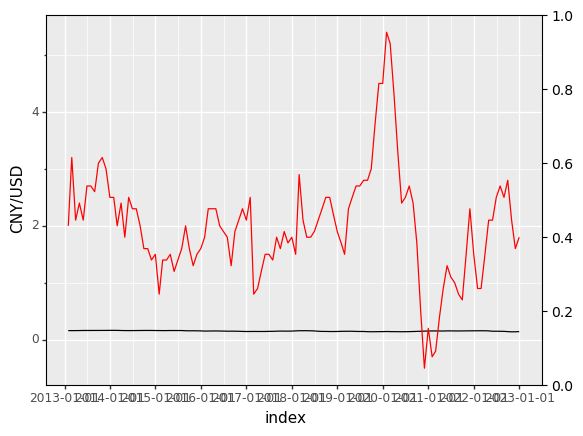

In [14]:
from plotnine import ggplot, aes, geom_line
import matplotlib.pyplot as plt

# create plot
p = ggplot(df3, aes(x='TIME'))
p = p + geom_line(aes(y='CNY/USD'))
p = p + geom_line(aes(y='Value'), color='red')

# add second y-axis
ax1 = p.draw()
ax2 = ax1.gca().twinx()

# show plot
plt.show()


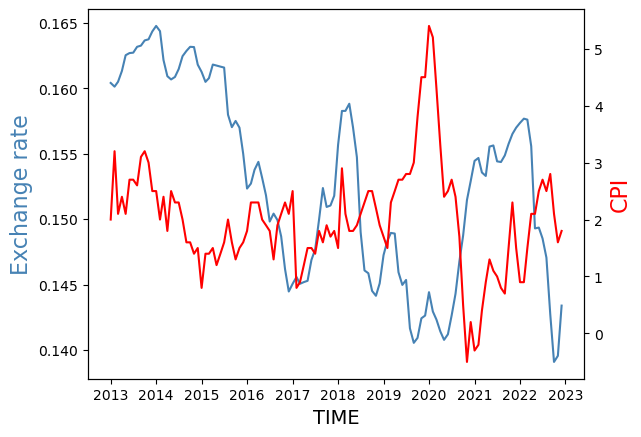

In [10]:
# matplotlib 可行
import matplotlib.pyplot as plt
col1='steelblue'
col2='red'

fig,ax=plt.subplots()

ax.plot(df3.TIME, df3['CNY/USD'], color=col1)

ax.set_xlabel('TIME',fontsize=14)

ax.set_ylabel('Exchange rate', color=col1, fontsize=16)

ax2=ax.twinx()

ax2.plot(df3.TIME, df3.Value, color=col2)

ax2.set_ylabel('CPI', color=col2, fontsize=16)

plt.show()


In [45]:
# do same thing in plotnine
from plotnine import ggplot, aes, geom_line

col1='steelblue'
col2='red'

p = ggplot(df3, aes(x='TIME'))

p += geom_line(aes(y='USD'), color=col1)

p += geom_line(aes(y='Value'), color=col2) + \
     scale_y_continuous(sec_axis=sec_axis(trans='reverse', name='CPI', 
                                           labels = lambda x: [str(i) for i in x]))

p += labs(x='TIME', y='Exchange rate')

p += theme(axis_text=element_text(size=14),
           axis_text_y=element_text(color=col1),
           axis_title=element_text(size=16))

p += theme(axis_text_y_sec=element_text(color=col2),
           axis_title_y_sec=element_text(size=16))

p.draw()


NameError: name 'sec_axis' is not defined

In [ ]:
# plotnine 单独画
from plotnine import ggplot, aes, geom_line

# create plot
p1 = ggplot(df3, aes(x='TIME')) + geom_line(aes(y='CNY/USD'), color='blue') 

p2 = ggplot(df3, aes(x='TIME'))+ geom_line(aes(y='Value'), color='red')

